In [1]:
from examples.AB_prepare_dataset import edges, nodes, nodepos, order_8, G, prepare_data
from rsmine.mi_estimator.MI_estimators import VBMI
import rsmine.coarsegrainer.cg_optimisers as cg_opt
from rsmine.coarsegrainer.cg_utils import *
from rsmine.coarsegrainer.analysis_utils import *
sys.path.append(os.pardir)


examples_dir = '.'
regions_data_dir = examples_dir + '/quasiperiodic_data/regions/'


/Users/efe/Documents/Research/RSMI-NE/rsmine/coarsegrainer/build_dataset.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [18]:
import sys, importlib
importlib.reload(sys.modules['rsmine.coarsegrainer.analysis_utils'])
from rsmine.coarsegrainer.analysis_utils import *

In [19]:
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable


cm = 1/2.54  # convert inches to centimeters
fontsize = 7

plt.rc('text', usetex=False)  # True
params = {
    'axes.grid': False,
    'savefig.dpi': 400,  # to adjust notebook inline plot size
    'axes.labelsize': fontsize,
    'axes.titlesize': fontsize,
    'font.size': fontsize,
    'legend.fontsize': fontsize, 
    'xtick.labelsize': fontsize,
    'ytick.labelsize': fontsize,
    'text.usetex': False,
    'font.family': 'Arial',
    'figure.facecolor': 'white',
}
mpl.rcParams.update(params)


In [20]:
case_dict = {'sigma1': {'8': {'case_no': 54}},
             'sigma2': {'8': {'case_no': 49, 'V_index': 389},
                        '3': {'case_no': 50, 'V_index': 16830}},
             'sigma3': {'8': {'case_no': 53, 'V_index': 389},
                        '3': {'case_no': 54, 'V_index': 429}},
             'sigma4': {'8': {'case_no': 51, 'V_index': 389},
                        '3': {'case_no': 52, 'V_index': 16704}}}


In [4]:
select_edges = {'8': None, '3': None}

In [34]:
scale = 'sigma2'

for vertex_type in ['3', '8']:
    case_no = case_dict[scale][vertex_type]['case_no']  
    V_index = case_dict[scale][vertex_type]['V_index'] 

    print(case_no, V_index)

    EV_params, data_params, cGV_edges, cGE_edges = prepare_data(V_index)
    EV_params['case_no'] = case_no

    select_edges[vertex_type] = cGV_edges[EV_params['case_no']] + cGE_edges[EV_params['case_no']]


50 16830
49 389


/Users/efe/Documents/Research/RSMI-NE/examples/AB_prepare_dataset.py:37: RuntimeWarning: invalid value encountered in double_scalars
  r = (vec[0]*ref_vec[0]+vec[1]*ref_vec[1])/(np.linalg.norm(vec)*np.linalg.norm(ref_vec))


number of nodes/vertices: (26177,)
number of nodes/vertices: (26177,)


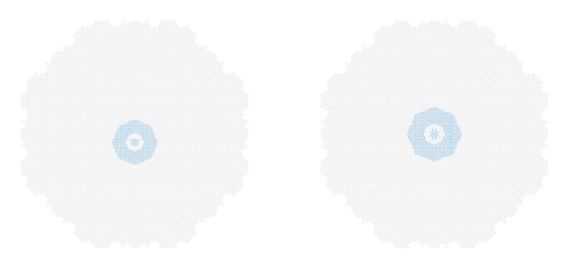

In [35]:
%matplotlib inline

num_cols = 2
figsize = (18*cm, 10*cm)
fig = plt.figure(figsize=figsize)


for i, v in enumerate(['3', '8']):
    ax = fig.add_subplot(1, num_cols, i+1)
    ax.margins(0.0, 0.0)
    full_graph_visualize(select_edges[v], edges=edges, nodes=nodes, nodepos=nodepos, 
                        cmap='tab20c_r', width=0.1, node_size=0.0, ax=ax)

plt.savefig('s2_ab_rsmi_regions.pdf', bbox_inches='tight', pad_inches=0.0)